## Orthogonal Collocation on Finite Elements

Discretization of a continuous time representation allow large-scale nonlinear programming (NLP) solvers to find solutions at specified intervals in a time horizon. There are many names and related techniques for obtaining mathematical relationships between derivatives and non-derivative values. Some of the terms that are relevant to this discussion include orthogonal collocation on finite elements, direct transcription, Gauss pseudospectral method, Gaussian quadrature, Lobatto quadrature, Radau collocation, Legendre polynomials, Chebyshev polynomials, Jacobi polynomials, Laguerre polynomials, any many more. There are many papers that discuss the details of the derivation and theory behind these methods1-5. The purpose of this section is to give a practical introduction to orthogonal collocation on finite elements with Lobatto quadrature for the numerical solution of differential algebraic equations. See the documentation on [Nodes](https://apmonitor.com/wiki/index.php/Main/OptionApmNodes) for additional details on displaying the internal nodes and the [course page on Orthogonal Collocation](https://apmonitor.com/do/index.php/Main/OrthogonalCollocation) for additional examples.

<img src='https://apmonitor.com/wiki/uploads/Main/nodes.png'>

### Solving with Gekko Automated Collocation

Solve the equation with NODES=4 at time points [0,1,2,3]:

$\frac{dy}{dt}=-y$

with initial condition $y_0=5$. Show the internal node solutions.

In [10]:
from gekko import GEKKO
m = GEKKO(remote=False) # create GEKKO model
y = m.Var(5.0,name='y') # create GEKKO variable
m.Equation(y.dt()==-y)  # create GEKKO equation
m.time = [0,1,2,3]      # time points
m.options.IMODE = 4     # simulation mode
m.options.NODES = 4     # set NODES=4
m.options.CSV_WRITE=2   # write results_all.json
                        #   with internal nodes
m.solve(disp=False)     # solve

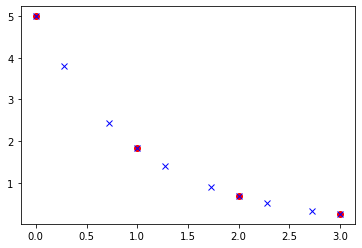

[5.0, 3.8005471961, 2.4275229267, 1.842105324, 1.4002016448, 0.8943505815, 0.67867040494, 0.51586378092, 0.32949759354, 0.25003647324]


In [18]:
import matplotlib.pyplot as plt
plt.plot(m.time,y.value,'ro')

# retrieve internal nodes from results_all.json
import json
with open(m.path+'//results_all.json') as f:
    results = json.load(f)
plt.plot(results['time'],results['y'],'bx')    
plt.show()
print(results['y'])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(m.time,y.value,'ro')

# retrieve internal nodes from results_all.json
import json
with open(m.path+'//results_all.json') as f:
    results = json.load(f)
plt.plot(results['time'],results['y'],'bx')    
plt.show()
print(results['y'])

### Solving without Gekko Automated Collocation

Repeat the solution with NODES=4 using Orthogonal Collocation on Finite Elements but only for the first time interval [0,1]:

$\frac{dy}{dt}=-y$

with initial condition $y_0=5$. Show the node solutions.

Use the matrix `NC` and collocation `time` points as shown in the APMonitor [journal article](https://www.sciencedirect.com/science/article/pii/S0098135414001306) or [preprint](https://apmonitor.com/wiki/uploads/Main/APMonitor_2014.pdf).

```python
import numpy as np

N = np.array([[0.436,-0.281, 0.121], \
              [0.614, 0.064, 0.0461], \
              [0.603, 0.230, 0.167]])

time = np.array([0.0, \
                 0.5-np.sqrt(5)/10.0, \
                 0.5+np.sqrt(5)/10.0, \
                 1.0])
```

#### Reference

* Hedengren, J. D. and Asgharzadeh Shishavan, R., Powell, K.M., and Edgar, T.F., Nonlinear Modeling, Estimation and Predictive Control in APMonitor, Computers and Chemical Engineering, Volume 70, pg. 133–148, 2014, doi: 10.1016/j.compchemeng.2014.04.013

In [16]:
import numpy as np
N = np.array([[0.436,-0.281, 0.121], \
              [0.614, 0.064, 0.0461], \
              [0.603, 0.230, 0.167]])

time = np.array([0.0, \
                 0.5-np.sqrt(5)/10.0, \
                 0.5+np.sqrt(5)/10.0, \
                 1.0])

In [19]:
from scipy.optimize import fsolve

y0 = 5
zGuess = np.zeros(6) # y1-y3 and dydt1-dydt3

def myFunction(z):
    y  = z[0:3]
    dy = z[3:6]

    F = np.empty(6)
    F[0:3] = np.dot(N,dy) - (y-y0)
    F[3:7] = dy + y
    return F

z = fsolve(myFunction,zGuess)
print(z)

[ 3.80135187  2.42579355  1.84220421 -3.80135187 -2.42579355 -1.84220421]
